# 선형 회귀 (Linear Regression)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[dataset] 보스턴 집값 예측 데이터
각 데이터베이스의 레코드는 보스턴 교외 또는 마을을 설명한다.

이 데이터는 1970년 보스턴 표준 도시 통계 지역(SMSA)에서 수집되었다. (UCI ML Repository에서 발췌):

- CRIM: 마을별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 주거용 토지 비율
- INDUS: 비소매 업종이 차지하는 마을별 비율
- CHAS: 찰스강 더미 변수 (강과 인접한 지역이면 1, 아니면 0)
- NOX: 질소 산화물 농도 (1,000만분의 1 단위)
- RM: 주택당 평균 방 개수
- AGE: 1940년 이전에 지어진 자가 소유 주택 비율
- DIS: 보스턴 고용 센터 5곳까지의 가중 거리
- RAD: 방사형 고속도로 접근성 지수
- TAX: $10,000당 전체 재산세율
- PTRATIO: 마을별 학생-교사 비율
- B: 
-  (여기서 Bk는 마을별 흑인 비율)
- LSTAT: 저소득층 인구 비율
- MEDV: (타겟) Median House Value 자가 소유 주택의 중앙값 (단위: $1000s)

In [36]:
boston_df = pd.read_csv('./data/boston_housing_train.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


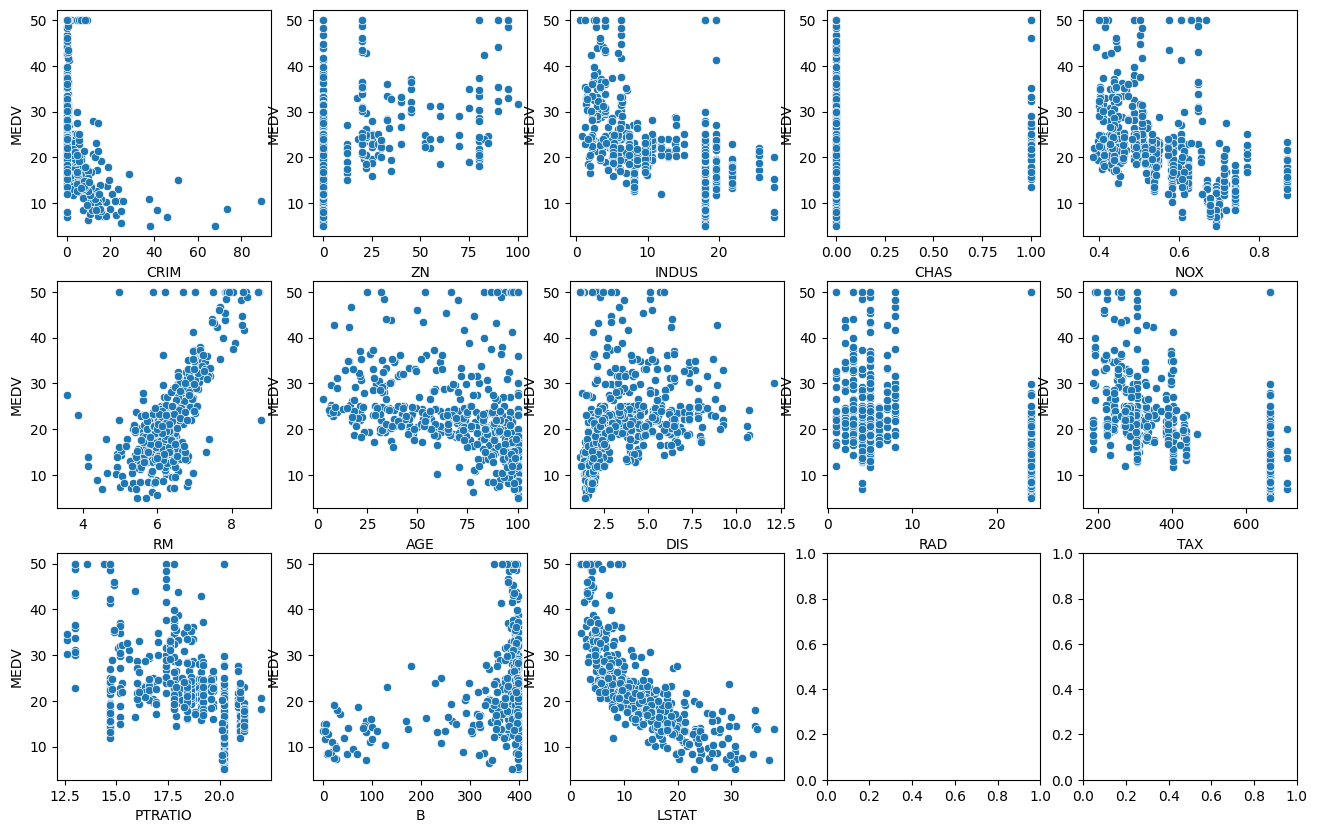

In [61]:
fig, ax = plt.subplots(figsize=(16,10), ncols=5, nrows=3)

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
           'RM', 'AGE', 'DIS', 'RAD', 'TAX',
           'PTRATIO', 'B', 'LSTAT']

for i, col_name in enumerate(columns):
    row = i // 5
    col = i % 5
    ax_temp = ax[row, col]   # ax[row][col]도 되지만 보통 이렇게

    sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)
    # sns.regplot(data=boston_df,x=col_name,y='MEDV',ax=ax_tempt)

In [38]:
from sklearn.model_selection import train_test_split

X = boston_df.drop('MEDV',axis=1)
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [40]:
print(boston_df.columns)
lr.coef_, lr.intercept_

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


(array([-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,  2.77350326e+00,
        -1.62388292e+01,  4.36875476e+00, -9.24808158e-03, -1.40086668e+00,
         2.57761243e-01, -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]),
 np.float64(29.83642016383845))

In [41]:
# 회귀모델 score()의 기본 평가 지표 == R^2 score (결정계수) / 과소적합 상태 학습 > 훈련
lr.score(X_train,y_train), lr.score(X_test,y_test)

(0.748087259862344, 0.684426728352709)

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test,y_pred)         # (정답, 예측)을 넣어 비교
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}')

MSE: 22.09869482709827 | RMSE: 4.700924890603791 | MAE: 3.0609395954370795 | R2score: 0.684426728352709


### 다항회귀
- 회귀식이 선형이 아닌 2차, 3차 방정식으로 표현되는 회귀 기법

In [43]:
# 과적합 상태를 해결해줌, X 데이터를 늘려줌으로써 test의 적합도를 높임
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False,degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly.shape)
poly.get_feature_names_out()

(379, 104)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

In [59]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_poly)
rmse = root_mean_squared_error(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f'MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}')
print(lr_poly.score(X_train_poly, y_train), lr_poly.score(X_test_poly, y_test))

MSE: 15.69743582712957 | RMSE: 3.961998968592694 | MAE: 2.583196774476 | R2score: 0.7758378393294851
0.9448313975211593 0.7758378393294851


### [한번 해보기] 캘리포니아 집값 예측 해보기

In [69]:
from sklearn.datasets import fetch_california_housing

california_ds = fetch_california_housing()
print(california_ds.keys())

print(california_ds.target_names)
print(california_ds.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedHouseVal']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


##### 1. DataFrame 생성 -> 구조/기초 통계(요약) 확인
##### 2. 시각화 -> 특성확인 (hint 우리가 위에서 했음)
##### 3. 다중회귀 (학습-평가-MSE/RMSE/R2score까지 확인)
##### 4. 다항회귀 (학습-평가-MSE/RMSE/R2score까지 확인)

In [70]:
df = pd.DataFrame(california_ds.data,columns=california_ds.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


ValueError: Could not interpret value `MedHouseVal` for `y`. An entry with this name does not appear in `data`.

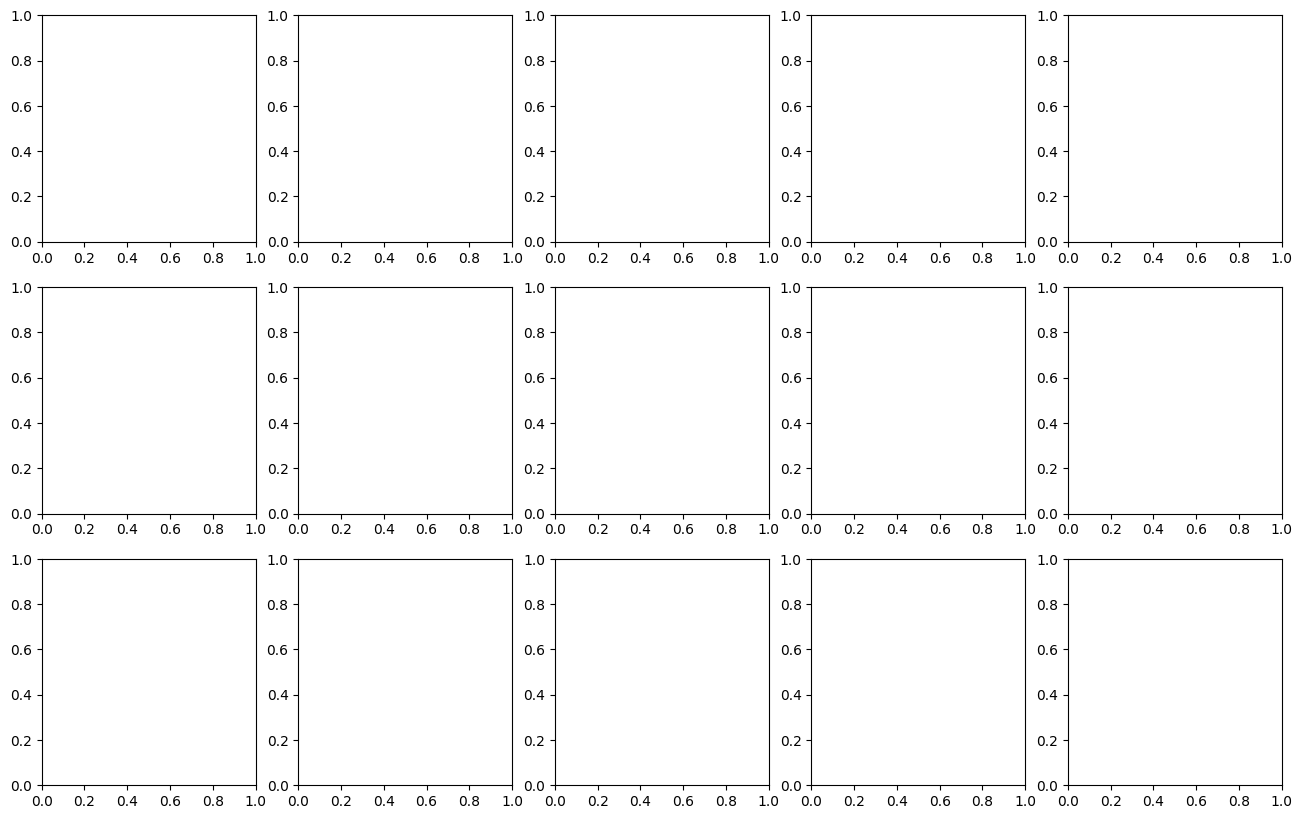

In [89]:
fig, ax = plt.subplots(figsize=(16,10), ncols=5, nrows=3)

columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

for i, col_name in enumerate(columns):
    row = i // 5
    col = i % 5
    ax_temp = ax[row, col]   # ax[row][col]도 되지만 보통 이렇게

    sns.scatterplot(data=df, x=col_name, y='MedHouseVal', ax=ax_temp)
    # sns.regplot(data=boston_df,x=col_name,y='MEDV',ax=ax_tempt)

    

[참고] 과대적합/과소적합
https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = train_test_split(iris_data.data ,iris_data.target,test_size=.10,random_state=0,stratify=iris_data.target)

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california_ds.data,california_ds.target, random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [80]:
lr.score(X_train,y_train), lr.score(X_test,y_test)

(0.609873031052925, 0.5910509795491351)

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

y_pred = lr.predict(X_test)

def evaluate_regression(y_ture, y_pred):
    mse = mean_squared_error(y_ture, y_pred)        # (테스트,정답) 입력
    rmse = root_mean_squared_error(y_ture, y_pred)
    mae = mean_absolute_error(y_ture, y_pred)
    r2 = r2_score(y_ture, y_pred)

    return(f'MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}')

MSE: 0.5411287478470689 | RMSE: 0.7356145375446769 | MAE: 0.5296964012919744 | R2score: 0.5910509795491351


In [82]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False,degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly.shape)
poly.get_feature_names_out()

(15480, 44)


array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2', 'x0 x1',
       'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x1^2',
       'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x2^2',
       'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x3^2', 'x3 x4',
       'x3 x5', 'x3 x6', 'x3 x7', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7',
       'x5^2', 'x5 x6', 'x5 x7', 'x6^2', 'x6 x7', 'x7^2'], dtype=object)

In [ ]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_poly)
rmse = root_mean_squared_error(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f'MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}') # 오차값이므로, 낮을수록 좋음 / R2score는 높아야 좋음 
print(lr_poly.score(X_train_poly, y_train), lr_poly.score(X_test_poly, y_test)) 

MSE: 0.45478928469921964 | RMSE: 0.6743806675010929 | MAE: 0.4646020777049507 | R2score: 0.6563005879298475
0.6829089327528397 0.6563005879298475


In [ ]:
from sklearn.pipeline import Pipeline

p_model = Pipeline([
    ('poly',PolynomialFeatures(include_bias=False, degree=2)),
    ('lr',LinearRegression()),
])

# 학습
p_model.fit(X_train,y_train)

# 평가
p_model.score(X_test,y_test)

#= 예측
y_pred = p_model.predict(X_test)
evaluate_regression(y_test,y_pred)

In [94]:
p_model_lr = p_model.named_steps['lr']
p_model_lr.coef_ , p_model_lr.intercept_

(array([-1.18149889e+01, -8.49101205e-01,  7.93341506e+00, -3.90263703e+01,
        -4.90164991e-04,  1.03727716e+00,  8.27990514e+00,  5.74137596e+00,
        -3.05936096e-02,  1.59801803e-03,  3.86922837e-02, -1.38726408e-01,
         5.11408720e-05, -3.84501143e-03, -1.61733233e-01, -1.51724214e-01,
         2.11029782e-04, -5.98080385e-04,  1.09081918e-02,  2.56573547e-06,
        -1.97181493e-03, -1.03455044e-02, -1.00661914e-02,  1.16865966e-02,
        -1.16437970e-01, -5.51721955e-05,  2.13589483e-02,  1.06985141e-01,
         1.00602280e-01,  2.88810791e-01,  4.88926279e-04, -8.65448374e-02,
        -5.40042730e-01, -4.96189957e-01,  1.42020540e-09,  2.44088253e-05,
         1.05046721e-05,  3.64069361e-06,  5.25946150e-05,  2.03788796e-02,
         1.58781028e-02,  5.80472939e-02,  1.01661358e-01,  3.81657320e-02]),
 np.float64(205.9539259931978))